   # Homework 2

In [1]:
# Use Scikit learn to try out 3 different types of regression models to predict the price of that stock 
# for a future date. 

# In 12 minutes: Stocks Analysis with Pandas and Scikit-Learn
# https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7

# Pandas Datareader
# https://pandas-datareader.readthedocs.io/en/latest/

In [2]:
import pandas as pd
import datetime
import pandas_datareader.data as web # pip install pandas_datareader
from pandas import Series, DataFrame

In [3]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 9, 8)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,208.740005
2019-09-03,206.979996,204.220001,206.429993,205.699997,20023000.0,205.699997
2019-09-04,209.479996,207.320007,208.389999,209.190002,19188100.0,209.190002
2019-09-05,213.970001,211.509995,212.000000,213.279999,23913700.0,213.279999
2019-09-06,214.419998,212.509995,214.050003,213.259995,19350800.0,213.259995


## Rolling Mean (Moving Average) — to determine trend

In [4]:
'''
Rolling mean/Moving Average (MA) smooths out price data by creating a constantly updated average price. 
This is useful to cut down “noise” in our price chart. Furthermore, this Moving Average 
could act as “Resistance” meaning from the downtrend and uptrend of stocks you could expect it 
will follow the trend and less likely to deviate outside its resistance point.
'''

close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [5]:
mavg.tail(10)

Date
2019-08-23    197.960657
2019-08-26    198.086917
2019-08-27    198.186503
2019-08-28    198.286788
2019-08-29    198.391109
2019-08-30    198.498685
2019-09-03    198.564745
2019-09-04    198.682279
2019-09-05    198.841507
2019-09-06    198.996962
Name: Adj Close, dtype: float64

In [6]:
# This will calculate the Moving Average for the last 100 windows (100 days) of stocks closing price 
# and take the average for each of the window’s moving average. As you could see, 
# The Moving Average steadily rises over the window and does not follow the jagged 
# line of stocks price chart

In [7]:
# For better understanding, let’s plot it out with Matplotlib. We will overlay the Moving Average 
# with our Stocks Price Chart.

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

In [8]:
# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

'2.2.2'

In [9]:
# Adjusting the style of matplotlib
style.use('ggplot')

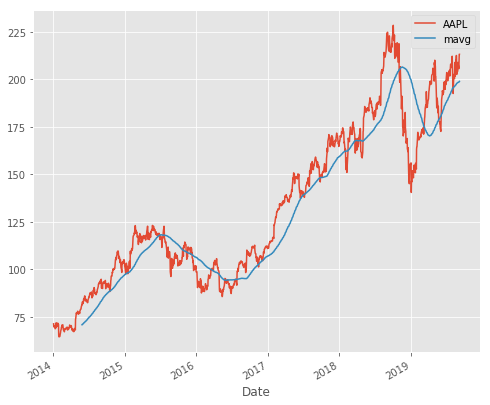

In [10]:
close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

In [11]:
# The Moving Average makes the line smooth and showcase the increasing or decreasing trend of stocks price.

# In this chart, the Moving Average showcases increasing trend the upturn or downturn of stocks price. 
# Logically, you should buy when the stocks are experiencing downturn and sell when the stocks 
# are experiencing upturn.

## Return Deviation — to determine risk and return (or Heart Health)

In [12]:
# Expected Return measures the mean, or expected value, of the probability 
# distribution of investment returns. The expected return of a portfolio is 
# calculated by multiplying the weight of each asset by its expected return 
# and adding the values for each investment — Investopedia.

# https://www.investopedia.com/terms/r/returnoninvestment.asp

In [13]:
# Formula:

# ROI = (Current Value of Investment - Cost of Investment) / Cost of Investment

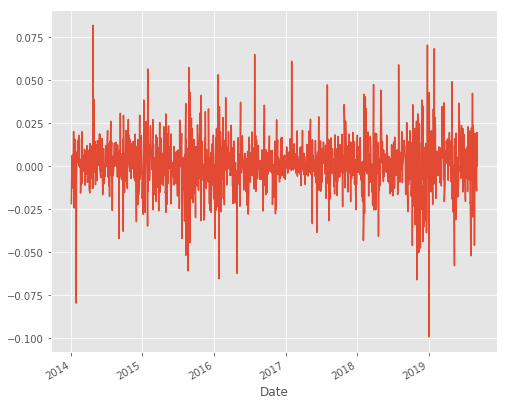

In [14]:
# Plotting the Return Rate
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [15]:
# Logically, our ideal stocks should return as high and stable as possible. 
# If you are risk averse(like me), you might want to avoid this stocks as 
# you saw the drop of 7.5% in 2014. This decision is heavily subjected to your 
# general sentiment of the stocks and competitor analysis.

## Analysing your Competitors Stocks

In [16]:
# In this segment, we are going to analyse on how one company performs 
# in relative with its competitor. Let’s assume we are interested in 
# technology companies and want to compare the big guns: 
# Apple, GE, Google, IBM, and Microsoft.

In [17]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']

In [18]:
dfcomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2019-08-30,208.740005,8.25,1188.099976,135.529999,137.860001
2019-09-03,205.699997,8.33,1168.390015,134.100006,136.039993
2019-09-04,209.190002,8.80,1181.410034,136.320007,137.630005
2019-09-05,213.279999,8.81,1211.380005,140.970001,140.050003
2019-09-06,213.259995,8.71,1204.930054,140.570007,139.100006


## Correlation Analysis — Does one competitor affect others?

In [19]:
# We can analyse the competition by running the percentage change 
# and correlation function in pandas. Percentage change will find 
# how much the price changes compared to the previous day which 
# defines returns. Knowing the correlation will help us see whether 
# the returns are affected by other stocks’ returns

In [20]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()

In [21]:
corr

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.278409,0.485615,0.375110,0.535253
GE,0.278409,1.000000,0.264475,0.365195,0.284154
GOOG,0.485615,0.264475,1.000000,0.404896,0.634376
IBM,0.375110,0.365195,0.404896,1.000000,0.476631
MSFT,0.535253,0.284154,0.634376,0.476631,1.000000


Text(0,0.5,'Returns GE')

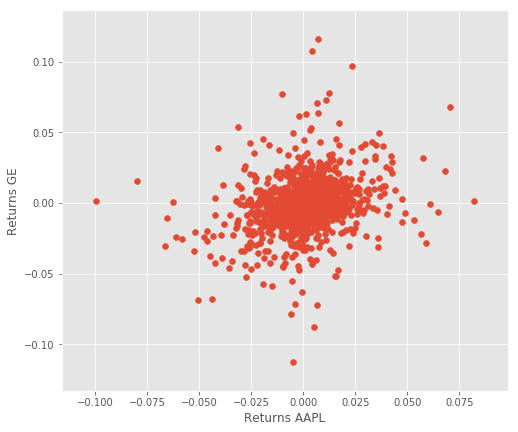

In [22]:
# Let’s plot Apple and GE with ScatterPlot to view their return distributions.

plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

In [23]:
# We can see here that there are slight positive correlations among GE returns and Apple returns. 
# It seems like that the higher the Apple returns, the higher GE returns as well for most cases.

In [24]:
### Kernel Density Estimate (KDE)

In [25]:
# Let us further improve our analysis by plotting the scatter_matrix to visualize 
# possible correlations among competing stocks. At the diagonal point, we will 
# run Kernel Density Estimate (KDE). KDE is a fundamental data smoothing problem 
# where inferences about the population are made, based on a finite data sample. 
# It helps generate estimations of the overall distributions.

# https://en.wikipedia.org/wiki/Kernel_density_estimation?source=post_page-----a8d8a7b50ee7----------------------

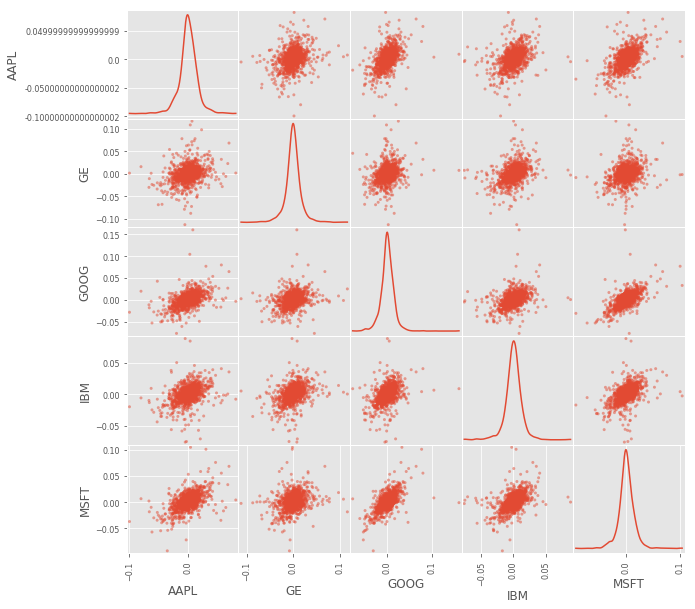

In [26]:
# KDE Plots and Scatter Matrix
# pd.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

In [27]:
# From here we could see most of the distributions among stocks which approximately positive correlations.

## Heat Maps

In [28]:
# To prove the positive correlations, we will use heat maps to visualize the correlation ranges 
# among the competing stocks. Notice that the lighter the color, the more correlated the two stocks are.

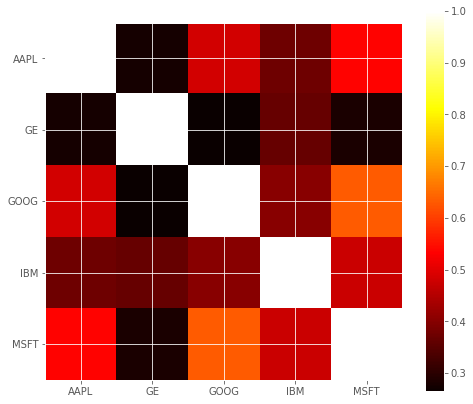

In [29]:
# Heatmap of Correlations among competing stocks
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

In [30]:
# From the Scatter Matrix and Heatmap, we can find great correlations among the competing stocks. 
# However, this might not show causality, and could just show the trend in the technology industry 
# rather than show how competing stocks affect each other.

## Stocks Returns Rate and Risk

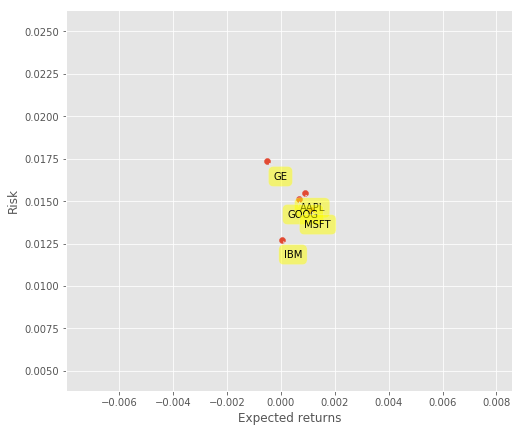

In [31]:
# Apart from correlation, we also analyse each stock’s risks and returns. 
# In this case we are extracting the average of returns (Return Rate) and 
# the standard deviation of returns (Risk).

# Quick Scatter Plot among Stocks Risk and Returns
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

## Predicting Stocks Price

In [32]:
# We will use these three machine learning models to predict our stocks: 
# Simple Linear Analysis, Quadratic Discriminant Analysis (QDA), and K Nearest Neighbor (KNN). 
# But first, let us engineer some features: High Low Percentage and Percentage Change.

dfreg = df.loc[:,["Adj Close","Volume"]]
dfreg["HL_PCT"] = (df["High"] - df["Low"]) / df["Close"] * 100.0
dfreg["PCT_change"] = (df["Close"] - df["Open"]) / df["Open"] * 100.0
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2014-01-02,71.320679,58671200.0,0.905754,-0.458900
2014-01-03,69.754066,98116900.0,2.452955,-2.148827
2014-01-06,70.134438,103152700.0,2.426789,1.205691
2014-01-07,69.632866,79302300.0,1.488783,-0.786301
2014-01-08,70.073868,64632400.0,1.264124,0.863020


## Pre-processing & Cross Validation

In [33]:
# 1 - Drop missing value

# 2 - Separating the label here, we want to predict the AdjClose

# 3 - Scale the X so that everyone can have the same distribution for linear regression

# 4 - Finally We want to find Data Series of late X and early X (train) for model generation and evaluation

# 5 - Separate label and identify it as y

# 6 - Separation of training and testing of model by cross validation train test split

In [34]:
import math as math
import numpy as np
from sklearn import preprocessing

In [35]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

In [36]:
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

In [37]:
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

In [38]:
# Scale the X so that everyone can have the same distribution for linear regression
# X = preprocessing.StandardScaler()

# UserWarning: Numerical issues were encountered when centering the data and might not be solved. 
# Dataset may contain too large values. You may need to prescale your features.
X = preprocessing.scale(X) 

In [39]:
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [40]:
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [41]:
print('X shape:', X.shape)
print('y shape', y.shape)

X shape: (1415, 4)
y shape (1415,)


## Model Generation — Where the prediction fun starts

In [42]:
# use pip install sklearn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# splitting the train and test sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# ISSUE HERE!!!
# from sklearn import preprocessing,cross_validation,neighbors,svm
# X_train, X_test, y_train, y_test= cross_validation.train_test_split(X,y,test_size=0.2)

# DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
#   "This module will be removed in 0.20.", DeprecationWarning)

### Note:

In [43]:
# The linear regression was quite easy, however in the Quadratics and KNN I've used schema from 
# Mr. Ravi Mishra. It was very useful for me to understand how Scilab works. 

# https://github.com/ravimishragit/Machine_Learning_To_MM/blob/master/assignment_2/Stock_Prediction.ipynb

## Simple Linear Analysis & Quadratic Discriminant Analysis

In [44]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

## K Nearest Neighbor (KNN)

In [45]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

## Evaluation

In [46]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

# results
print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)

The linear regression confidence is  0.9457207173437636
The quadratic regression 2 confidence is  0.9500151731399074
The quadratic regression 3 confidence is  0.9527427501483584
The knn regression confidence is  0.9379178708301688


## Forecast Functions

In [47]:
def getForecastSet(clf, df, X):
    df_aux = df.copy()
    f_set = clf.predict(X)
    df_aux['Forecast'] = np.nan
    return (f_set, df_aux)

In [48]:
def createForecast(df, f_set):
    df_aux = df.copy()
    last_date = df_aux.iloc[-1].name
    last_unix = last_date
    next_unix = last_unix + datetime.timedelta(days=1)

    for i in f_set:
        next_date = next_unix
        next_unix += datetime.timedelta(days=1)
        df_aux.loc[next_date] = [np.nan for _ in range(len(df_aux.columns) - 1)] + [i]
    
    return df_aux

In [49]:
def plotForecast(df, days):
    df['Adj Close'].tail(days).plot()
    df['Forecast'].tail(days).plot()
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    # plt.rc('figure', figsize=(10, 9))
    plt.show()

## Forecast Linear Regression

In [50]:
forecast_set, dfreg1 = getForecastSet(clfreg, dfreg, X_lately)
print(forecast_set, forecast_out)

[206.93128533 211.04280695 211.01145177 213.3556837  213.29463672
 203.92108653 207.07262943 205.44000601 206.42202777 209.76769905
 209.7367726  206.69757092 209.94600322 213.75519743 214.07691122] 15


In [51]:
dfreg1 = createForecast(dfreg1, forecast_set)

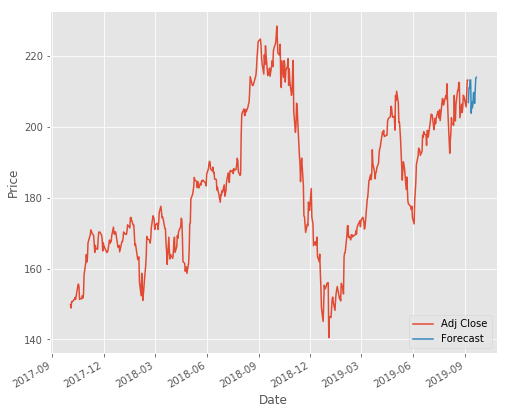

In [52]:
plotForecast(dfreg1, 500)

## Forecast Quadratic Regression 2

In [53]:
forecast_set, dfreg2 = getForecastSet(clfpoly2, dfreg, X_lately)
print(forecast_set, forecast_out)

[205.40797889 210.3375361  209.97681246 212.92090424 213.09383723
 200.97396014 205.972673   206.01979295 207.16810295 209.58381452
 210.16270352 207.28128401 209.91029574 212.3792463  214.13769846] 15


In [54]:
dfreg2 = createForecast(dfreg2, forecast_set)

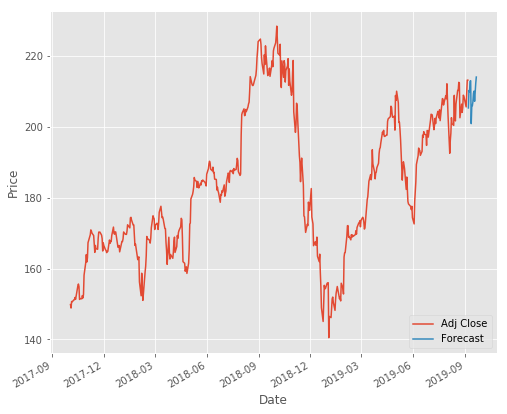

In [55]:
plotForecast(dfreg2, 500)

## Forecast Quadratic Regression 3

In [56]:
forecast_set, dfreg3 = getForecastSet(clfpoly3, dfreg, X_lately)
print(forecast_set, forecast_out)

[203.71257247 209.66574927 209.17701132 212.209234   213.27160272
 196.03842922 204.9239043  208.1821378  207.49363406 209.2054718
 211.20795507 208.2726175  209.30521795 210.24414536 213.89235757] 15


In [57]:
dfreg3 = createForecast(dfreg3, forecast_set)

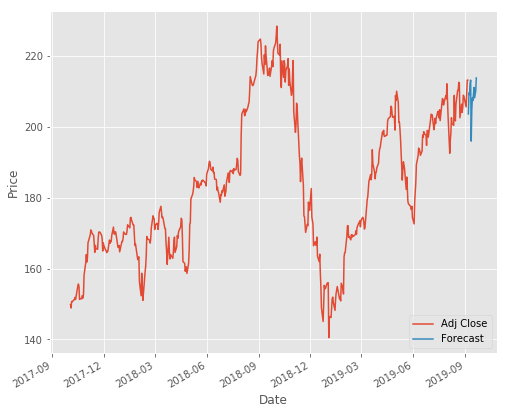

In [58]:
plotForecast(dfreg3, 500)

## Forecast KNN Regression

In [59]:
forecast_set, dfregKNN = getForecastSet(clfknn, dfreg, X_lately)
print(forecast_set, forecast_out)

[191.83917999 216.38222504 218.02178192 198.47382355 212.2759552
 198.05927277 203.27432251 207.62261963 207.44680786 213.45978546
 197.07834625 204.93800354 217.66236877 214.13420868 206.41863251] 15


In [60]:
dfregKNN = createForecast(dfregKNN, forecast_set)

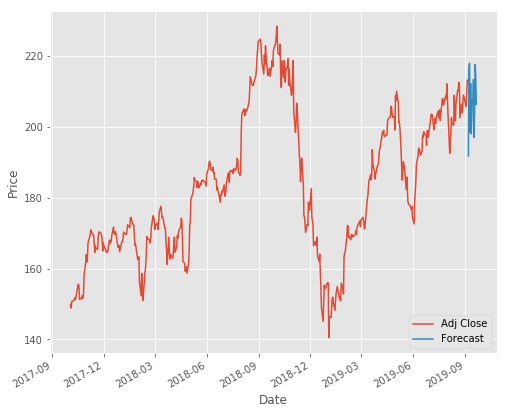

In [61]:
plotForecast(dfregKNN, 500)